# Hyperparameter Tuning

This files tests different parameters for the Random Forest classifier, and assess where the validation data reaches a maximum without overfitting.

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [20]:
def tune (name):
    # Initiate empty df to store results
    results = pd.DataFrame({"max_depth":[], "n_estimators":[], "accuracy":[]})
    # 
    # TODO: CHANGE THIS LATER TO PREPROCESSING_IV
    # THEN YOU ALSO DONT HAVE TO SPLIT TRAIN/TEST ANYMORE
    # 
    # import data
    df = pd.read_csv('data/preprocessing_II/' + name +'.csv')
    df['admittime'] = pd.to_numeric(pd.to_datetime(df['admittime']))
    df['icd_code_count'] = df['icd_code_count'].fillna(0)
    df['icd_code_count'] = df['icd_code_count'].astype(int)
    df['emar_count'] = df['emar_count'].fillna(0)
    df['emar_count'] = df['emar_count'].astype(int)
    df['lab_count'] = df['lab_count'].fillna(0)
    df['lab_count'] = df['lab_count'].astype(int)

    # split labels and features
    X = df[['hadm_id', 'subject_id', 'admittime', 'anchor_age', 'anchor_year', 'icd_code_count', 'emar_count', 'lab_count']]
    y = df['has_kidney_issue']

    # split train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # try different values for max_depth of the individual trees
    for depth in [6, 8, 10, 12, 14, 16, 18, 20]:
        # try different values for the number of trees in a forest
        for estimator in [10, 50, 100, 150, 200, 250, 300]:
            # train classifier
            clf = RandomForestClassifier(n_estimators=estimator, max_depth=depth, random_state=42)
            clf.fit(X_train, y_train)
            # predict labels
            y_pred = clf.predict(X_test)
            # calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)
            # append results to df
            new_result = pd.DataFrame({"max_depth":depth, "n_estimators":estimator, "accuracy":accuracy}, index=[0])
            results = pd.concat([results, new_result])
    
    # reset indexing
    results = results.reset_index(drop=True)

    # return
    return results

Highest accuracy:
 max_depth         8.000000
n_estimators    100.000000
accuracy          0.881105
Name: 9, dtype: float64


Text(0.5, 0, 'accuracy')

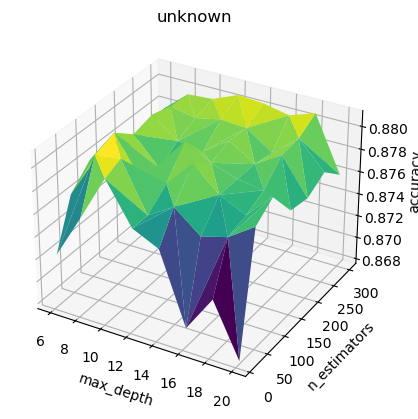

In [23]:
unknown = tune('unknown')
print("Highest accuracy:\n", unknown.loc[unknown['accuracy'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(unknown["max_depth"], unknown["n_estimators"], unknown["accuracy"], cmap='viridis', edgecolor='none')
ax.set_title("unknown")
ax.set_xlabel("max_depth")
ax.set_ylabel("n_estimators")
ax.set_zlabel("accuracy")

Highest accuracy:
 max_depth        20.000000
n_estimators    200.000000
accuracy          0.852145
Name: 53, dtype: float64


Text(0.5, 0, 'accuracy')

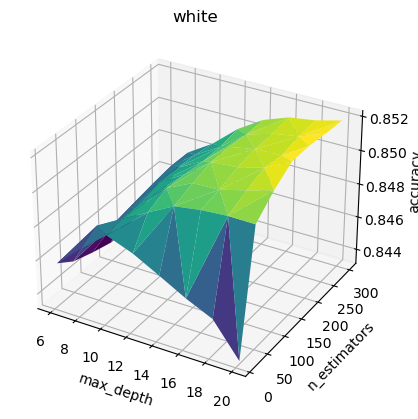

In [24]:
white = tune('white')
print("Highest accuracy:\n", white.loc[white['accuracy'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(white["max_depth"], white["n_estimators"], white["accuracy"], cmap='viridis', edgecolor='none')
ax.set_title("white")
ax.set_xlabel("max_depth")
ax.set_ylabel("n_estimators")
ax.set_zlabel("accuracy")

In [ ]:
other = tune('other')
print("Highest accuracy:\n", other.loc[other['accuracy'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(other["max_depth"], other["n_estimators"], other["accuracy"], cmap='viridis', edgecolor='none')

In [ ]:
asian = tune('asian')
print("Highest accuracy:\n", asian.loc[asian['accuracy'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(asian["max_depth"], asian["n_estimators"], asian["accuracy"], cmap='viridis', edgecolor='none')

In [ ]:
hispanic_latino = tune('hispanic_latino')
print("Highest accuracy:\n", hispanic_latino.loc[hispanic_latino['accuracy'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(hispanic_latino["max_depth"], hispanic_latino["n_estimators"], hispanic_latino["accuracy"], cmap='viridis', edgecolor='none')

In [ ]:
black_african_american = tune('black_african_american')
print("Highest accuracy:\n", black_african_american.loc[black_african_american['accuracy'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(black_african_american["max_depth"], black_african_american["n_estimators"], black_african_american["accuracy"], cmap='viridis', edgecolor='none')

In [ ]:
unable_to_obtain = tune('unable_to_obtain')
print("Highest accuracy:\n", unable_to_obtain.loc[unable_to_obtain['accuracy'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(unable_to_obtain["max_depth"], unable_to_obtain["n_estimators"], unable_to_obtain["accuracy"], cmap='viridis', edgecolor='none')

In [ ]:
american_indian_alaska_native = tune('american_indian_alaska_native')
print("Highest accuracy:\n", american_indian_alaska_native.loc[american_indian_alaska_native['accuracy'].idxmax()])
ax = plt.axes(projection='3d')
ax.plot_trisurf(american_indian_alaska_native["max_depth"], american_indian_alaska_native["n_estimators"], american_indian_alaska_native["accuracy"], cmap='viridis', edgecolor='none')